In [2]:
#Packages for visualisation
#Scikit-Learn Packages
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Visualisation and Other packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
#Load the digit recognition dataset
digits = datasets.load_digits()

In [8]:
print(digits.keys())
print(digits.DESCR)

['images', 'data', 'target_names', 'DESCR', 'target']
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This ge

In [11]:
print("Shapes of Images : {}".format(digits.images.shape))
print("Shapes of Data : {}".format(digits.data.shape))

Shapes of Images : (1797, 8, 8)
Shapes of Data : (1797, 64)


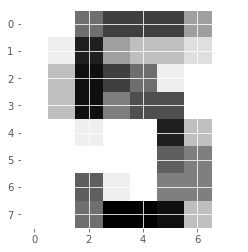

In [12]:
#Visual EDA
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [13]:
#Feature and Target Arrays
X = digits.data
y = digits.target

#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

# KNN Classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [14]:
# Fitting the classifier to the training data
knn.fit(X_train, y_train)

# Accuracy Score
print(knn.score(X_test, y_test))

0.983333333333


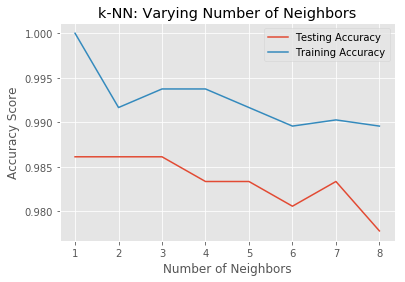

In [15]:
#Understanding relation between n_neighbors and accuracy
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #Accuracy computation on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Accuracy computation on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Plot for n_neighbors v/s Accuracy Score
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.show()